In [1]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

import pandas as pd
from pandas.io import gbq

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


NameError: ignored

In [3]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'cmmi10',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'cmsy10',
 'cmr10',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXGeneral',
 'cmb10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'Liberation Sans Narrow',
 'NanumBarunGothic',
 'Liberation Sans',
 'Liberation Sans',
 'NanumSquare',
 'NanumGothic',
 'Liberation Serif',
 'NanumSquare',
 'Liberation Serif',
 'NanumGothic',
 'Liberation Mono',
 'Liberation Sans',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberat

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'

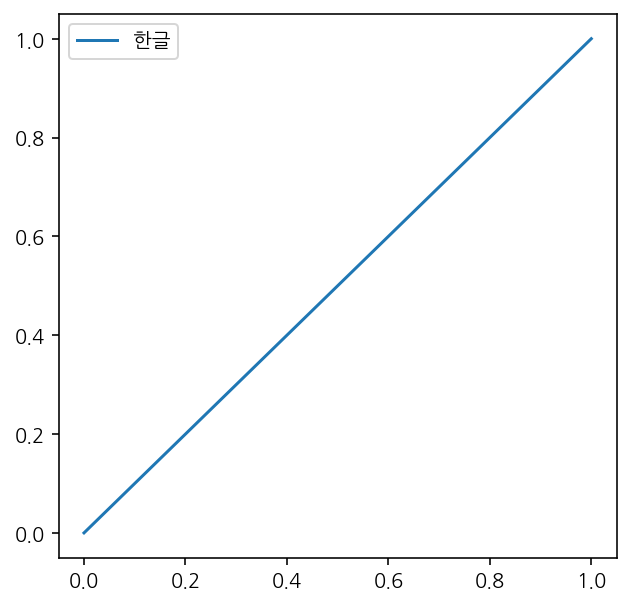

In [7]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글')
plt.legend()
plt.show()

In [8]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive


In [9]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive
 201901-202003.csv   data   Eric_Github.zip    submission.csv
'Colab Notebooks'    eric   submission01.csv


In [10]:
import time 

In [11]:
import pandas as pd
from pandas.io import gbq

# import submission file in Google Drive
submission = pd.read_csv('/content/drive/My Drive/submission.csv')

In [ ]:
submission.to_gbq(destination_table='jeju_data_ver1.submission', 
                  project_id='eric-dacon', 
                  if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=J3q7vyZZaNmJaP279zv9eSNEuyaQW2&prompt=consent&access_type=offline
Enter the authorization code: 4/1gHV0qAwsW1NmV011muPzj3ifWVLuEoHzu7I12Q3vaUTbL9Tnbb_PZM


1it [00:02,  2.52s/it]


In [ ]:
# import submission file in Google Drive
train = pd.read_csv('/content/drive/My Drive/201901-202003.csv')

# Connect to Google Cloud API and Upload DataFrame
train.to_gbq(destination_table='jeju_data_ver1.201901_202003_train', 
                  project_id='eric-dacon', 
                  if_exists='replace')

1it [08:03, 483.34s/it]


In [12]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [13]:
%%time

from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

train = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.201901_202003_train` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 7.12 s, sys: 464 ms, total: 7.58 s
Wall time: 20.1 s


In [14]:
%%time
project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

submission = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.submission` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 53.4 ms, sys: 2.23 ms, total: 55.7 ms
Wall time: 900 ms


In [15]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [16]:
#01 REG_YYMM
train['REG_YYMM']
#샘플데이터 안에서는 2019년 1월부터 8월까지, 예측해야 하는 값은 2020년 4월 

0         201901
1         201903
2         201903
3         201903
4         201904
           ...  
199995    201908
199996    201908
199997    201908
199998    201908
199999    201908
Name: REG_YYMM, Length: 200000, dtype: int64

In [17]:
#02 CARD_SIDO_NM 
train['CARD_SIDO_NM'].unique()
# 총 11개의 시도 

array(['서울', '강원', '전북', '충북', '경기', '제주', '충남', '경북', '부산', '인천', '대구',
       '대전', '경남', '광주', '전남', '세종', '울산'], dtype=object)

In [18]:
#03 
train['STD_CLSS_NM'].value_counts()

체인화 편의점                  30082
한식 음식점업                  29090
비알콜 음료점업                 15473
피자 햄버거 샌드위치 및 유사 음식점업    13847
서양식 음식점업                 13510
슈퍼마켓                     12090
기타 대형 종합 소매업             11646
차량용 주유소 운영업               8427
빵 및 과자류 소매업               8133
중식 음식점업                   6334
일식 음식점업                   5224
기타음식료품위주종합소매업             4752
기타 외국식 음식점업               4599
화장품 및 방향제 소매업             3676
스포츠 및 레크레이션 용품 임대업        3656
택시 운송업                    3454
여관업                       2771
버스 운송업                    2600
그외 기타 종합 소매업              2248
전시 및 행사 대행업               2216
과실 및 채소 소매업               2212
욕탕업                       1599
육류 소매업                    1586
일반유흥 주점업                  1558
차량용 가스 충전업                1079
호텔업                       1049
면세점                       1026
수산물 소매업                   1020
휴양콘도 운영업                   883
정기 항공 운송업                  800
골프장 운영업                    769
관광 민예품 및 선물용품 소매업          739
기타 주점업  

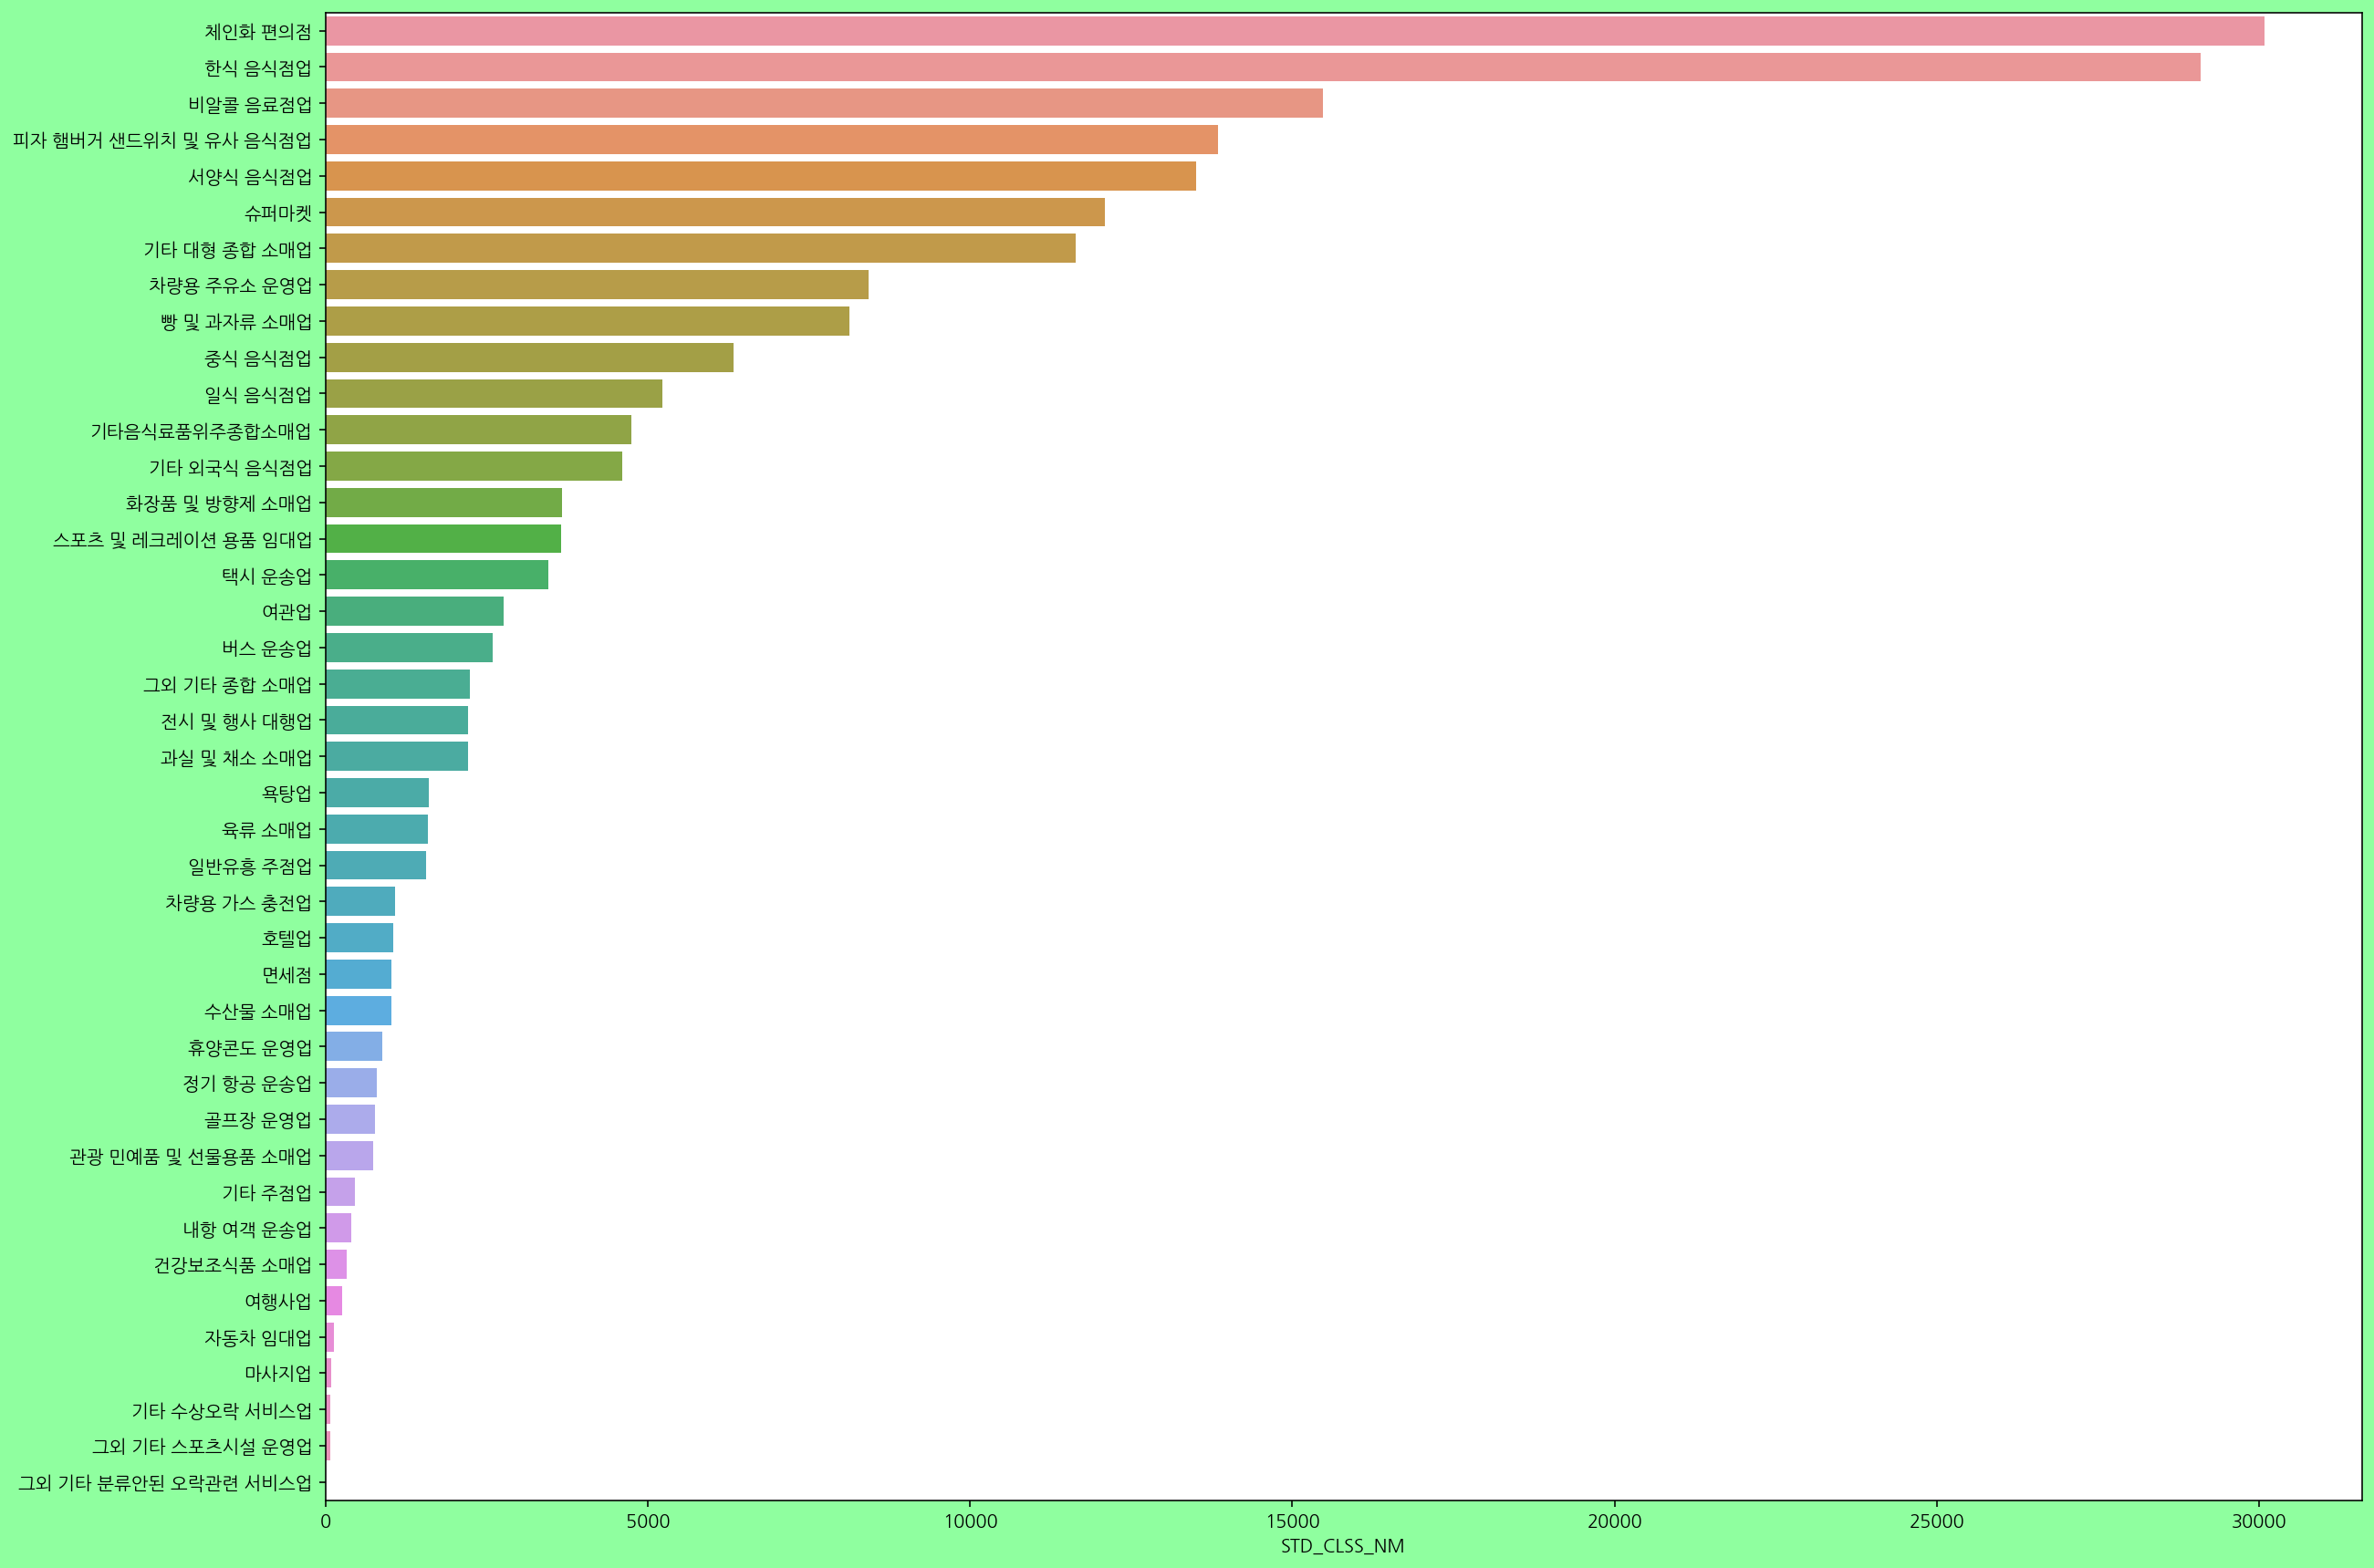

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
plt.rc('font', family='NanumGothic') 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')

sns.barplot(y=train['STD_CLSS_NM'].value_counts().index, x=train['STD_CLSS_NM'].value_counts())

In [20]:
train['AGE'].value_counts()

20s    124474
40s     19395
30s     17241
50s     15514
10s     11086
60s      9329
70s      2961
Name: AGE, dtype: int64

In [21]:
train['SEX_CTGO_CD'].value_counts()

1    111907
2     88093
Name: SEX_CTGO_CD, dtype: int64

In [22]:
#FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
train['FLC'].value_counts()

1    113008
2     41902
4     21163
5     12290
3     11637
Name: FLC, dtype: int64

In [ ]:
# 지역별 기준 시각화 

## 지역의 성격 
# 지역별 업종 분포도 
# 지역별 연령분포 
# 지역별 가구생애 주기 

## 매출액 
# 01. 지역별 매출액 
# 01-1. 지역별, 업종별 매출액 
# 02. 업종별 매출액 

In [20]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [28]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np 

In [30]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [82]:
city_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False)

In [83]:
city_sum

,CARD_SIDO_NM,STD_CLSS_NM,CNT
69,경기,체인화 편의점,4258626
249,서울,택시 운송업,2032818
32,강원,체인화 편의점,1925763
72,경기,한식 음식점업,1330418
35,강원,한식 음식점업,1119879
...,...,...,...
371,제주,그외 기타 분류안된 오락관련 서비스업,3
281,울산,일식 음식점업,3
148,대구,면세점,3
146,대구,기타 외국식 음식점업,3


In [84]:
city_sum['CARD_SIDO_NM'].unique()

array(['경기', '서울', '강원', '인천', '충남', '충북', '경북', '대전', '부산', '전북', '제주',
       '대구', '광주', '세종', '경남', '울산', '전남'], dtype=object)

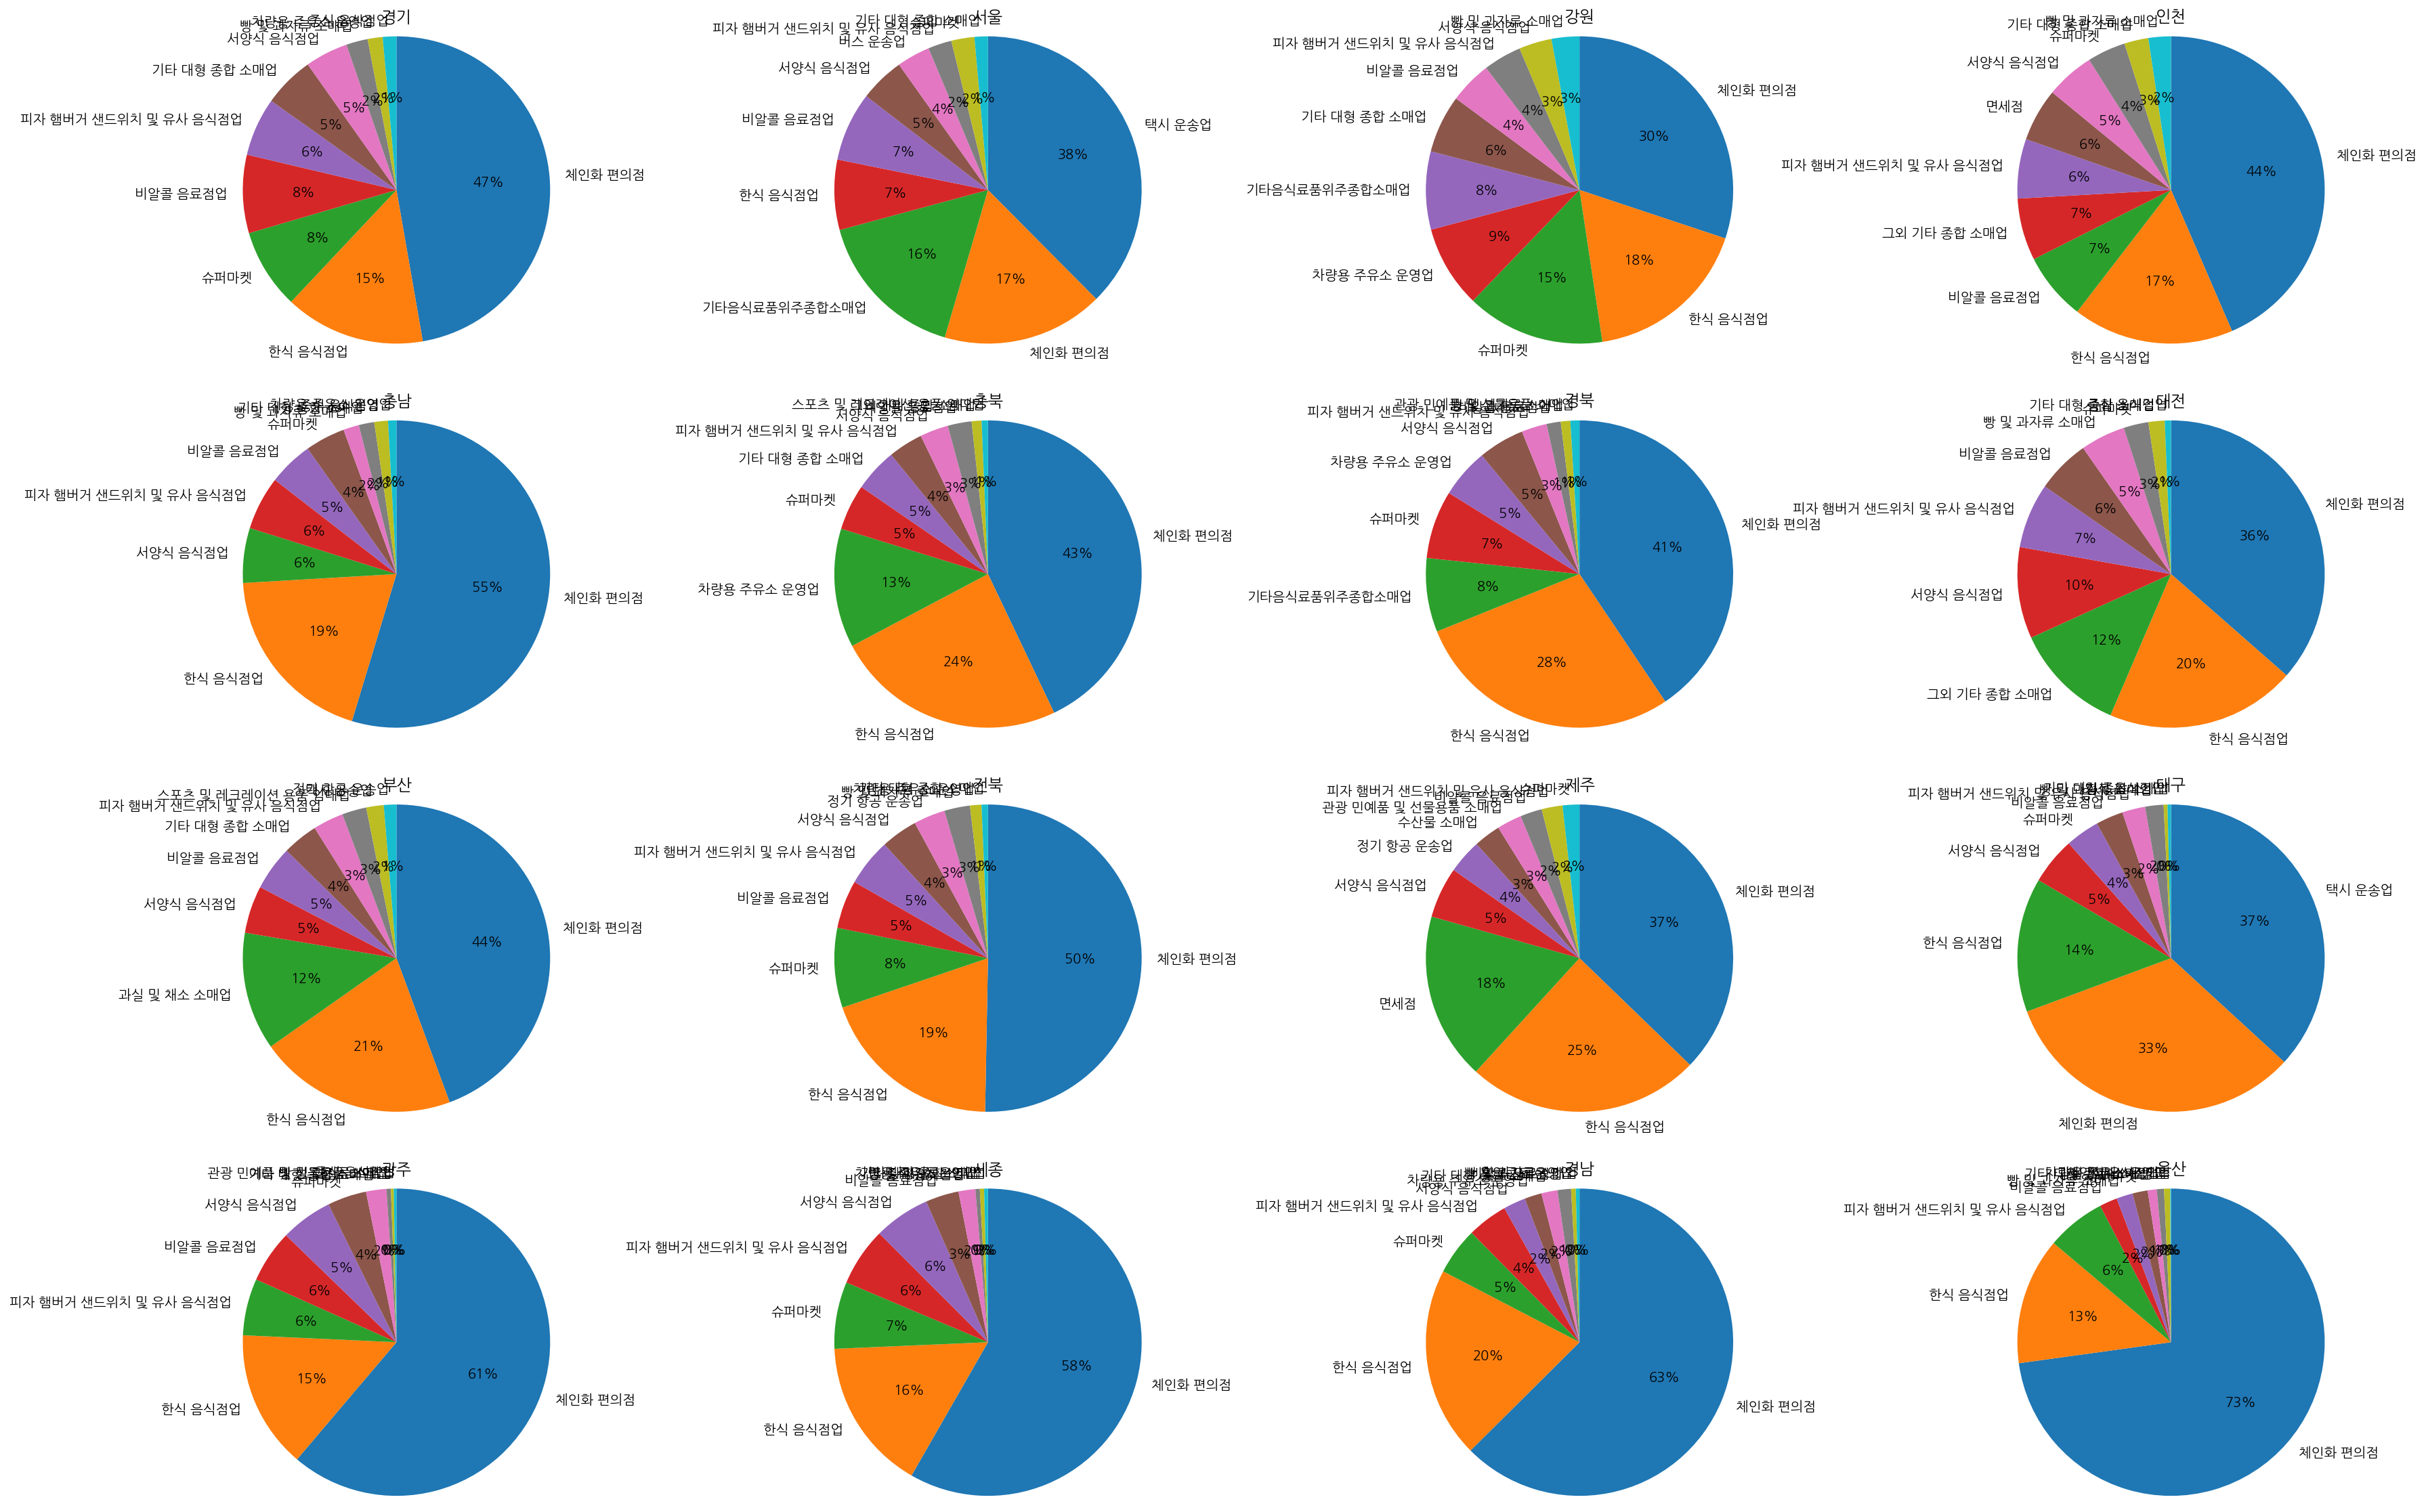

In [91]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:white')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
     axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
     axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
     axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
     axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[3, idx-12].title.set_text(city)

plt.show()
        



In [79]:
# 지역별 업종 분포 코드,, 한줄로 만들어보기 

for idx, city in 

 

e = train[train.CARD_SIDO_NM == '강원']
f = e.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False).head(10)

f.head()



,CARD_SIDO_NM,STD_CLSS_NM,CNT
32,강원,체인화 편의점,1925763
35,강원,한식 음식점업,1119879
19,강원,슈퍼마켓,931902
31,강원,차량용 주유소 운영업,553126
10,강원,기타음식료품위주종합소매업,525487


In [62]:
# 지역별 업종 분포를 알아보기 위해서, 서울 지역의 업종 분포를 찾아보자.

b = train[train.CARD_SIDO_NM == '서울']
c = b.groupby(b['STD_CLSS_NM'])['CNT'].sum().reset_index()
d = c.sort_values('CNT', ascending=False).head(10)
d


,STD_CLSS_NM,CNT
32,택시 운송업,2032818
31,체인화 편의점,919230
9,기타음식료품위주종합소매업,879944
34,한식 음식점업,399624
13,비알콜 음료점업,393522
15,서양식 음식점업,255614
12,버스 운송업,189482
33,피자 햄버거 샌드위치 및 유사 음식점업,134393
17,슈퍼마켓,131546
6,기타 대형 종합 소매업,76343


In [63]:
label = d['STD_CLSS_NM']
counts = d['CNT']

In [55]:
plt.figure(1, figsize=(60,30))
the_grid = GridSpec(2,2)

<Figure size 4320x2160 with 0 Axes>

In [52]:
cmap = plt.get_cmap('Spectral')

In [53]:
colors = [cmap(i) for i in np.linspace(0,1,8)]

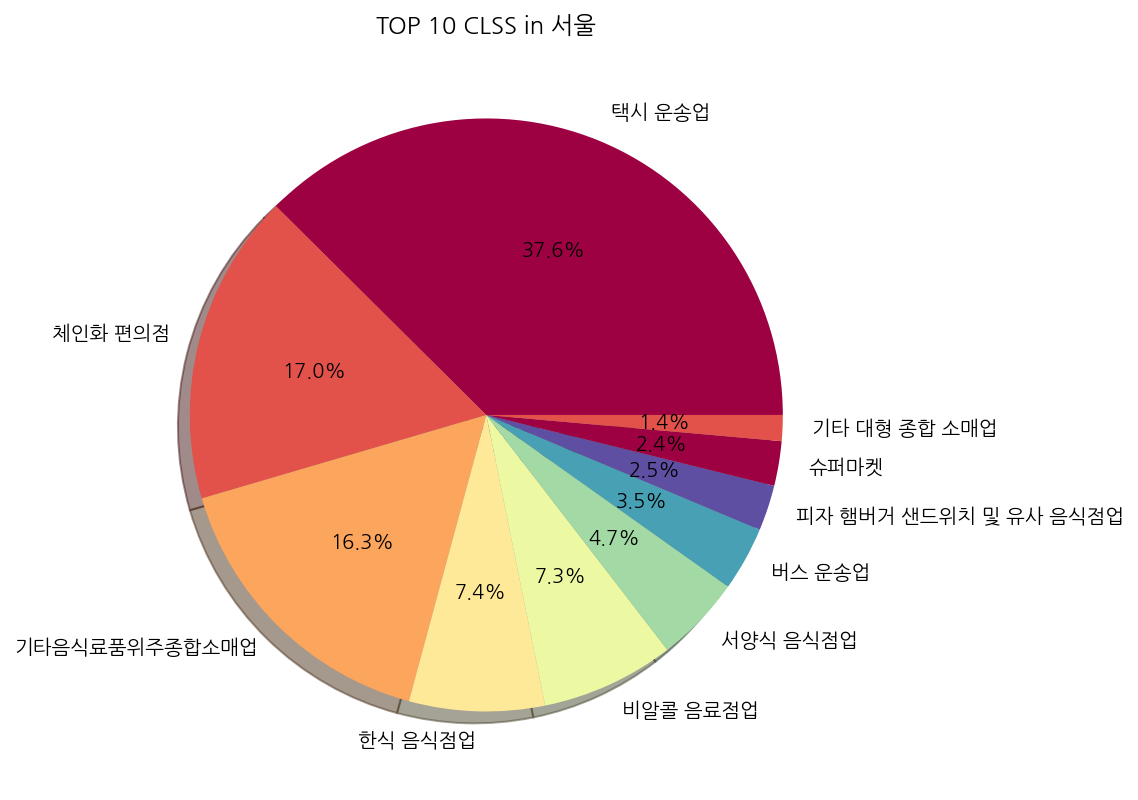

In [65]:
# 서울지역 업종분포 시각화 

plt.figure(1, figsize=(45,15))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1], aspect=1, title='TOP 10 CLSS in 서울')
source_pie = plt.pie(counts, labels=label, autopct='%1.1f%%', shadow=True, colors=colors)

plt.show( )

In [66]:
city_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

KeyError: ignored

In [67]:
city_sum_01 = city_sum[city_sum['CARD_SIDO_NM'] =='강원']
city_sum_01

NameError: ignored

In [ ]:
# city_sum_01 = city_sum[city_sum['CARD_SIDO_NM'] =='강원']
# city_sum_01

sns.barplot(x=city_sum_01['STD_CLSS_NM'], y=city_sum_01['sum'])

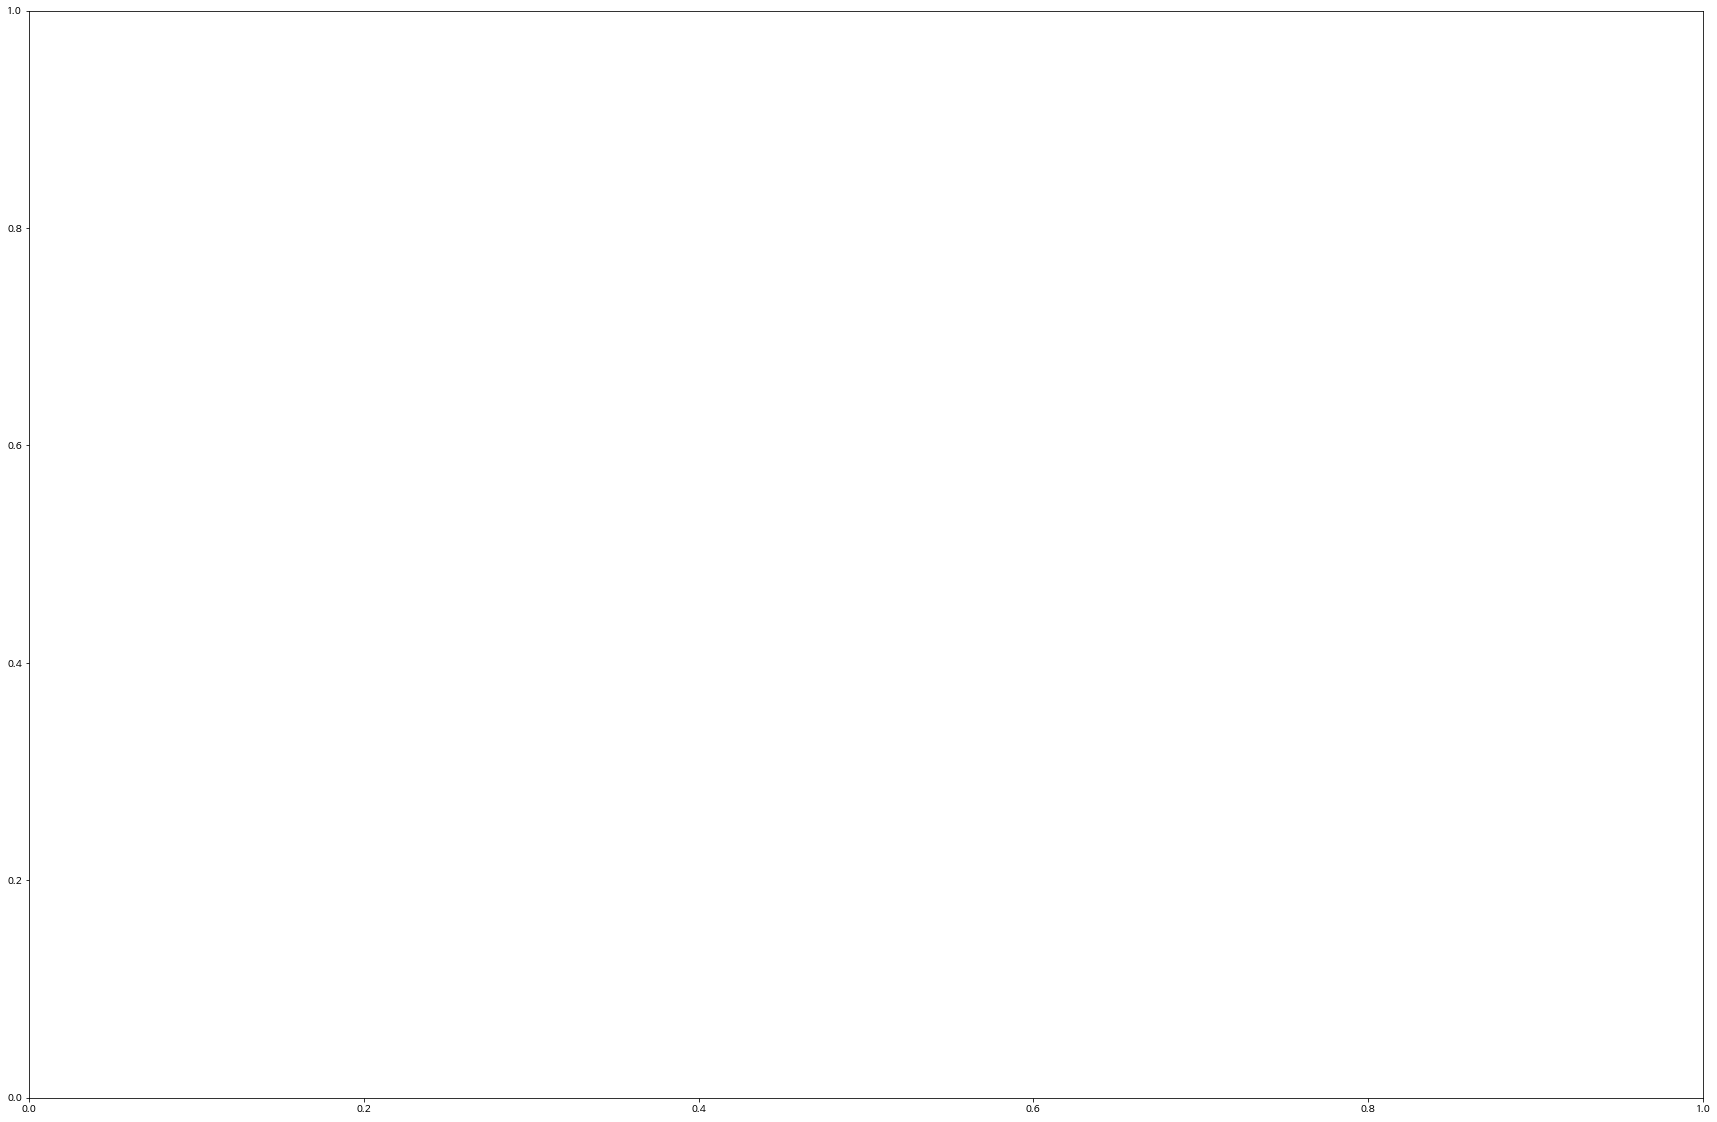

In [ ]:
fig,axs = plt.subplots(0,0)
fig.set_size_inches(30,20)
axs[0,0].pie(city_sum)

In [ ]:
submission.groupby('CARD_SIDO_NM')['STD_CLSS_NM'].unique()

CARD_SIDO_NM
강원    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경기    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
경북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
광주    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
대구    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
대전    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
부산    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
서울    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
세종    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
울산    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
인천    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
전남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
전북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
제주    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
충남    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
충북    [골프장 운영업, 과실 및 채소 소매업, 관광 민예품 및 선물용품 소매업, 그외 기...
Name: STD_CLSS_NM, dtype: object

In [ ]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [ ]:
t = pd.DataFrame(train)

In [ ]:
t['CARD_SIDO_NM']

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [ ]:
t['CARD_SIDO_NM'].unique()

array(['서울', '강원', '경기', '인천', '경북', '부산', '제주', '전북', '충북', '전남', '대구'],
      dtype=object)

In [ ]:
t['CARD_CCG_NM'].unique()

array(['동작구', '동해시', '서초구', '중구', '태백시', '평창군', '춘천시', '강릉시', '인제군',
       '과천시', '용인시 처인구', '원주시', '삼척시', '철원군', '구로구', '양구군', '양양군', '광명시',
       '용산구', '속초시', '홍천군', '정선군', '화천군', '여주시', '고성군', '횡성군', '영월군',
       '강서구', '용인시 기흥구', '시흥시', '광진구', '양천구', '가평군', '광주시', '부평구', '송파구',
       '성남시 분당구', '강남구', '칠곡군', '안양시 만안구', '해운대구', '영등포구', '제주시', '서귀포시',
       '이천시', '군산시', '음성군', '종로구', '의정부시', '보성군', '안양시 동안구', '양평군', '마포구',
       '부천시', '제천시', '수성구'], dtype=object)

In [ ]:
t['STD_CLSS_NM'].unique()

array(['택시 운송업', '서양식 음식점업', '버스 운송업', '체인화 편의점', '슈퍼마켓', '기타음식료품위주종합소매업',
       '비알콜 음료점업', '한식 음식점업', '전시 및 행사 대행업', '차량용 주유소 운영업',
       '화장품 및 방향제 소매업', '피자 햄버거 샌드위치 및 유사 음식점업', '빵 및 과자류 소매업', '중식 음식점업',
       '기타 대형 종합 소매업', '기타 외국식 음식점업', '스포츠 및 레크레이션 용품 임대업', '일식 음식점업',
       '골프장 운영업', '호텔업', '그외 기타 종합 소매업', '과실 및 채소 소매업', '육류 소매업', '여관업',
       '욕탕업', '휴양콘도 운영업'], dtype=object)

In [5]:
# Visualization Library Importing 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
plt.rc('font', family='NanumBarunGothic') 

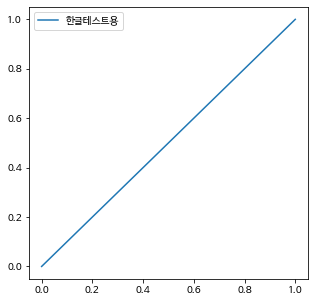

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

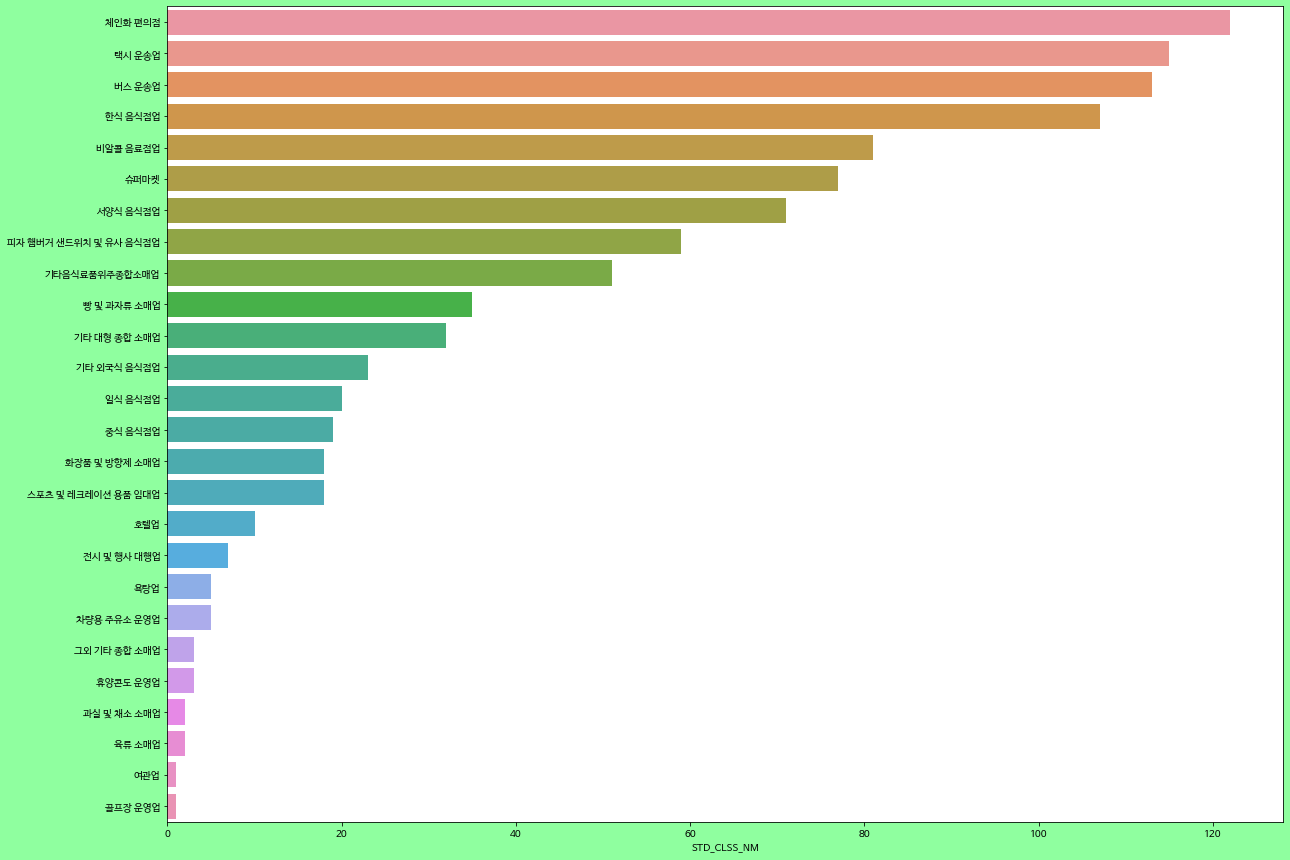

In [ ]:
# 업종별 등장 빈도수 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=t['STD_CLSS_NM'].value_counts().index, x=t['STD_CLSS_NM'].value_counts())

In [ ]:
city_count= train.groupby(['CARD_SIDO_NM','CARD_CCG_NM'])['STD_CLSS_NM'].value_counts().reset_index(name='count')
city_count.head()

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,count
0,강원,강릉시,체인화 편의점,11
1,강원,강릉시,슈퍼마켓,8
2,강원,강릉시,한식 음식점업,7
3,강원,강릉시,기타 대형 종합 소매업,5
4,강원,강릉시,기타음식료품위주종합소매업,5


In [ ]:
city_sum = city_count.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['count'].sum().reset_index(name='sum')
city_sum.head()

,CARD_SIDO_NM,STD_CLSS_NM,sum
0,강원,골프장 운영업,1
1,강원,과실 및 채소 소매업,1
2,강원,그외 기타 종합 소매업,2
3,강원,기타 대형 종합 소매업,28
4,강원,기타 외국식 음식점업,22


In [ ]:
submission.columns

Index(['id', 'REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT'], dtype='object')

In [ ]:
train['CARD_SIDO_NM'].unique()

array(['서울', '강원', '경기', '인천', '경북', '부산', '제주', '전북', '충북', '전남', '대구'],
      dtype=object)

In [ ]:
train['STD_CLSS_NM'].unique()

array(['택시 운송업', '서양식 음식점업', '버스 운송업', '체인화 편의점', '슈퍼마켓', '기타음식료품위주종합소매업',
       '비알콜 음료점업', '한식 음식점업', '전시 및 행사 대행업', '차량용 주유소 운영업',
       '화장품 및 방향제 소매업', '피자 햄버거 샌드위치 및 유사 음식점업', '빵 및 과자류 소매업', '중식 음식점업',
       '기타 대형 종합 소매업', '기타 외국식 음식점업', '스포츠 및 레크레이션 용품 임대업', '일식 음식점업',
       '골프장 운영업', '호텔업', '그외 기타 종합 소매업', '과실 및 채소 소매업', '육류 소매업', '여관업',
       '욕탕업', '휴양콘도 운영업'], dtype=object)

In [ ]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
99995,201905,서울,금천구,슈퍼마켓,경기,시흥시,20s,2,1,15,164660,20
99996,201905,서울,노원구,비알콜 음료점업,경기,수원시 권선구,20s,1,1,20,283200,48
99997,201905,서울,노원구,체인화 편의점,경기,성남시 수정구,20s,2,1,50,436690,140
99998,201905,서울,동대문구,빵 및 과자류 소매업,경기,이천시,20s,2,1,7,159190,37
99999,201905,서울,동대문구,슈퍼마켓,경기,구리시,20s,1,1,20,123650,31


In [ ]:
train = pd.DataFrame(train)